In [2]:
from lerobot.datasets.lerobot_dataset import LeRobotDataset

repo_id = 'Koorye/pika-tiny'
dataset = LeRobotDataset(repo_id=repo_id)
iterator = iter(dataset)

Resolving data files:   0%|          | 0/33 [00:00<?, ?it/s]

/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/third_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/left_wrist_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/left_wrist_fisheye_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/right_wrist_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/right_wrist_fisheye_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/third_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/left_wrist_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/left_wrist_fisheye_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika-tiny/videos/chunk-000/rig

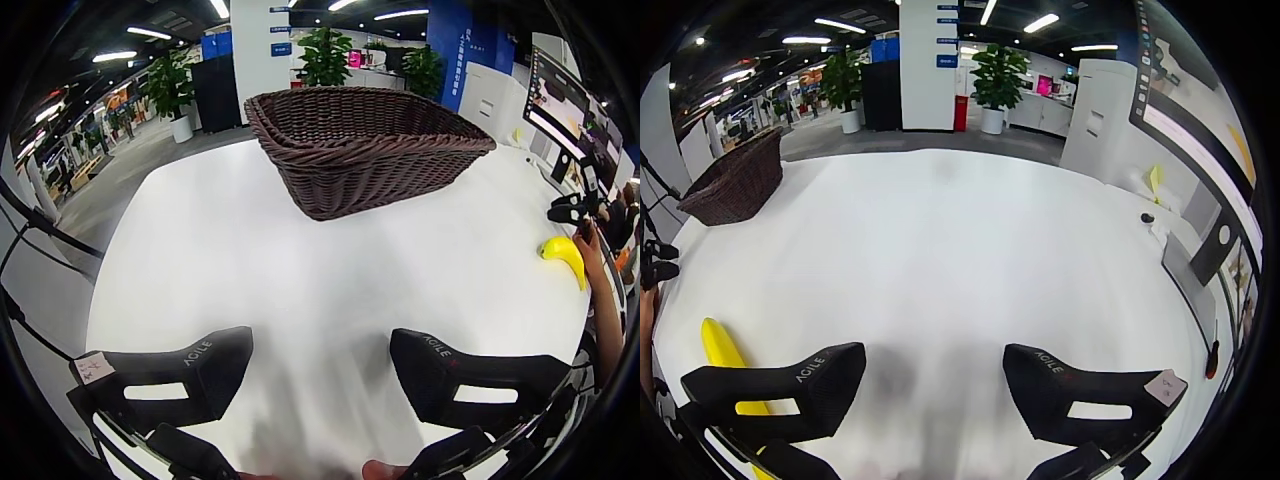

In [4]:
import cv2
from PIL import Image


def get_next_sample(iterator, k):
    sample = next(iterator)
    for _ in range(k - 1):
        sample = next(iterator)
    return sample

sample = get_next_sample(iterator, 10)
print(sample.keys())
print(sample['task'])
print(sample['actions'])
Image.fromarray(cv2.hconcat([
    sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy(), 
    sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy(),
]))

/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/third_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/left_wrist_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/left_wrist_fisheye_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/right_wrist_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/right_wrist_fisheye_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/third_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/left_wrist_base_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/left_wrist_fisheye_rgb/episode_000000.mp4
/home/shihanwu/.cache/huggingface/lerobot/Koorye/pika/videos/chunk-000/right_wrist_base_rgb/episode_000000.mp4
/home/sh

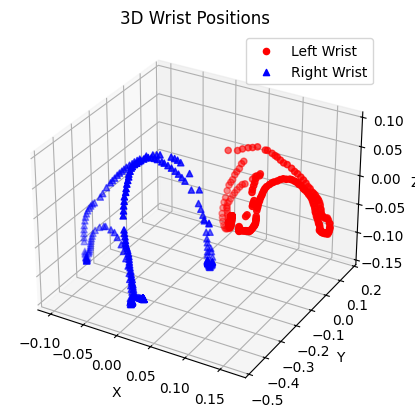

In [76]:
iterator = iter(dataset)
samples = []
for _ in range(500):
    sample = next(iterator)
    samples.append(sample)

left_states = [sample['states'][:3] for sample in samples]
right_states = [sample['states'][7:10] for sample in samples]

left_positions = [sample['actions'][:3] for sample in samples]
right_positions = [sample['actions'][7:10] for sample in samples]

import matplotlib.pyplot as plt
import numpy as np

# plot 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    [pos[0] for pos in left_positions],
    [pos[1] for pos in left_positions],
    [pos[2] for pos in left_positions],
    c='r', marker='o', label='Left Wrist'
)
ax.scatter(
    [pos[0] for pos in right_positions],
    [pos[1] for pos in right_positions],
    [pos[2] for pos in right_positions],
    c='b', marker='^', label='Right Wrist'
)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Wrist Positions')                                                
ax.legend()
plt.show()

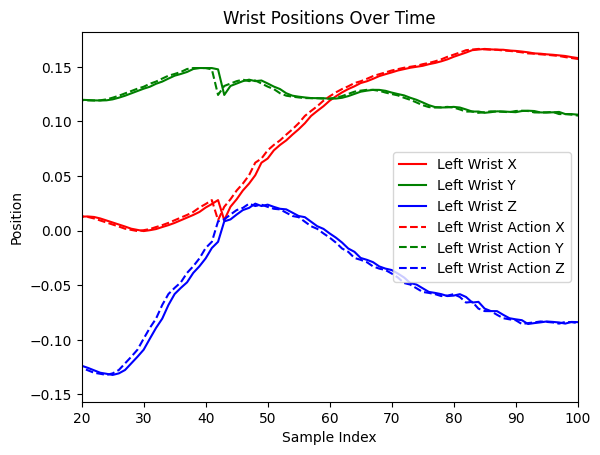

In [84]:
plt.plot(np.arange(len(left_states)), [state[0] for state in left_states], label='Left Wrist X', c='r')
plt.plot(np.arange(len(left_states)), [state[1] for state in left_states], label='Left Wrist Y', c='g')
plt.plot(np.arange(len(left_states)), [state[2] for state in left_states], label='Left Wrist Z', c='b')
plt.plot(np.arange(len(left_positions)), [action[0] for action in left_positions], label='Left Wrist Action X', c='r', linestyle='--')
plt.plot(np.arange(len(left_positions)), [action[1] for action in left_positions], label='Left Wrist Action Y', c='g', linestyle='--')
plt.plot(np.arange(len(left_positions)), [action[2] for action in left_positions], label='Left Wrist Action Z', c='b', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Position')
plt.title('Wrist Positions Over Time')
plt.xlim(20, 100)
plt.legend()
plt.show()